# Linear Regression Practice - with some data exploration

Ok, so we got some basic statistics vocabulary out of the way in the last section. Now it's time to explore our data. We want to figure out what's in our data and how it is structured. This will allow us to understand how the data needs to be manipulated so that we can best model it. Let's get started by getting our libraries imported and loading our data:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
dataset = pd.read_csv('data\iris.data', names=['sep lnth', 'sep wdth', 'pet lnth', 'pet wdth'], index_col=4)


## Data Exploration:
Let's take a look at how our data is structured:

In [126]:
dataset

,sep lnth,sep wdth,pet lnth,pet wdth
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3
Iris-virginica,6.3,2.5,5.0,1.9
Iris-virginica,6.5,3.0,5.2,2.0
Iris-virginica,6.2,3.4,5.4,2.3


As well as some basic statistical information about our data:

In [128]:
dataset.describe()  

,sep lnth,sep wdth,pet lnth,pet wdth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It looks like our statistical summary indicates the greatest standard deviation in sepal length and petal length. Let's see what the covariance matrix looks like:

In [5]:
#Covariance Matrix: 
cov_m = dataset.T @ dataset
cov_m

,sep lnth,sep wdth,pet lnth,pet wdth
sep lnth,5223.85,2670.98,3484.25,1127.65
sep wdth,2670.98,1427.05,1673.91,531.53
pet lnth,3484.25,1673.91,2583.00,868.97
pet wdth,1127.65,531.53,868.97,302.30


It looks like the greatest covarience occurs between sepal and petal length. This makes me want to plot the two and see what the correlation looks like. Remember, the magnitude of the covariance does not necissarily imply anything about the strength of the correlation:

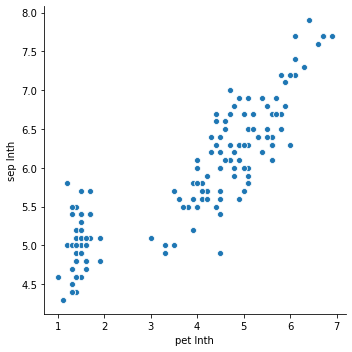

In [6]:
sns.relplot(x='pet lnth', y='sep lnth', data=dataset)

As it turns out, there appears to be fairly strong postive correlation between petal length and sepal length. It looks to me like $\rho \approx 1$. Let's plot an estimate of the probability density function for petal length:

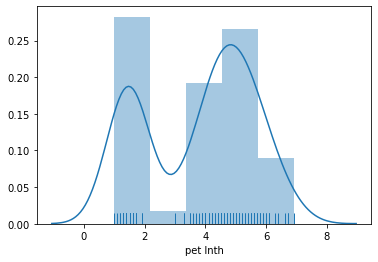

In [28]:
sns.distplot(dataset['pet lnth'], rug=True) # A kernel density estimate (estimate of probability density function)

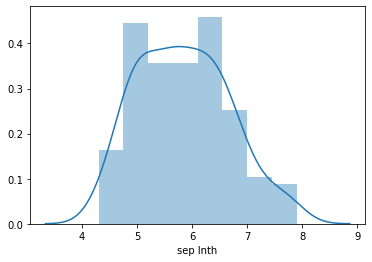

In [123]:
sns.distplot(dataset['sep lnth'], rug=False) 

The above density functions seem to indicate that there is more apparent grouping in the sepal length variable. This is also noticeable in the initial scatter plot of these two variables.

# Linear Regression Practice: 

Let's try to predict sepal length based on petal width using linear regression. First, we split our data into dependent and independent variables. Then, we will pull out some of the data and reserve it for testing after we have trained our model:

In [133]:
X = dataset['pet wdth'].to_numpy().reshape(-1,1)
Y = dataset['sep wdth'].to_numpy().reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0)

Now, we have split our data out and we want to train our model:

In [134]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, we can find the parameters of our model, namely slope and intercept:

In [135]:
print(regressor.intercept_)
print(regressor.coef_)

[3.24343302]
[[-0.16196015]]


And now to make test predictions with unlabeled data, we can use our x_test data, which was previously split from our initial dataset:

In [136]:
y_pred = regressor.predict(x_test)
y_pred.shape


(45, 1)

Now, lets put our findings into a data frame, look at the data and then plot it!

In [137]:
df = pd.DataFrame(data={'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,2.8,2.854729
1,2.2,3.081473
2,4.2,3.211041
3,2.9,2.951905
4,3.4,3.211041
5,3.3,2.838533
6,3.5,3.194845
7,3.1,3.000493
8,2.8,3.016689
9,2.8,3.032885


## An Aside: Plotting with different libraries. 
Now that we have trained our model, let's plot the results of how well it did. We will take this opportunity to talk about three common libraries used to plot: matplotlib, seaborn, and pandas. I want to try to build the same bar graph comparing our model's predictions to the actual results, using all three libraries. Seaborn and Pandas both plot by using matplotlib in the backend, but let's see how the implementation is different. 

First, let's try with __pandas__:

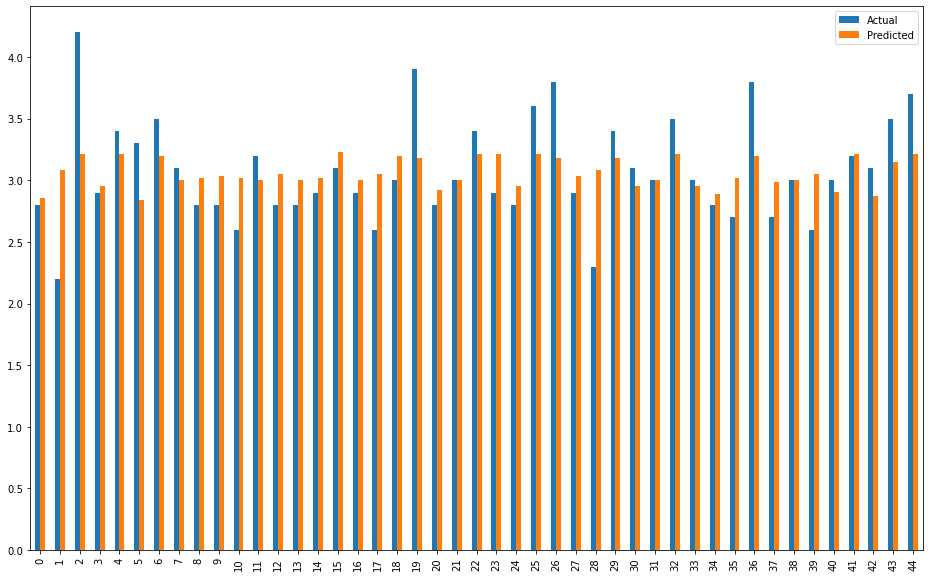

In [138]:
# Plot with Pandas DataFrame.plot()
df.plot(kind='bar', figsize=(16,10))

Well, that was easy. What about with __matplotlib__:

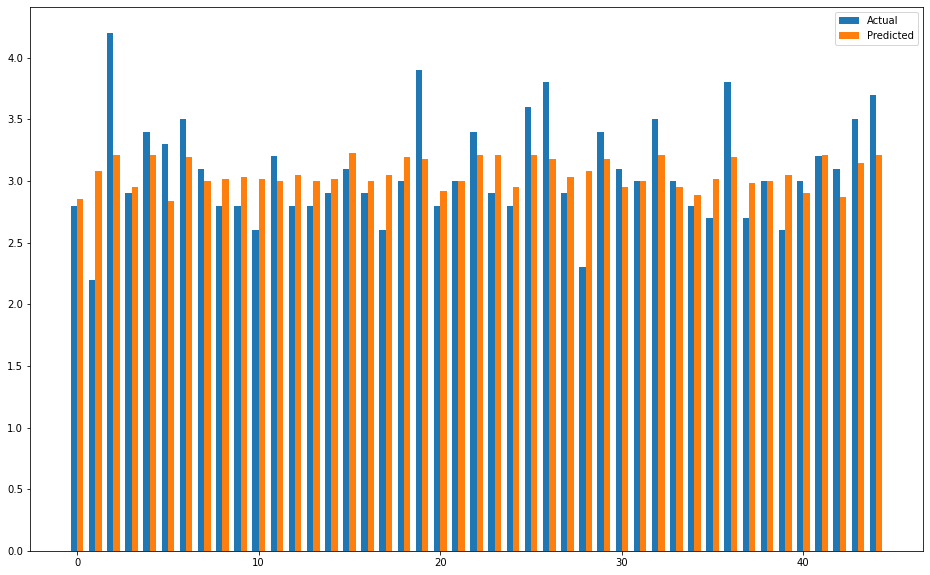

In [139]:
plt.figure(figsize=(16,10))
plt.bar(df.index - .35/2, df.iloc[:,0], .35, label='Actual')
plt.bar(df.index + .35/2, df.iloc[:,1], .35, label='Predicted')
plt.legend()

It looks like using __matplotlib__ was a little more complicated. We had to figure out some math that would allow us to have enough space on the x-axis for both sets of data. We had to specify our rectangle widths. We had to specify the labels for our two different categories. All of this was taken care of for us by __pandas__.

Finally, let's take a look at using __seaborn__:

First, seaborn requires data to be in long format if you want to plot groups of bars based on categories. As a refresher, here are the definitions:

- __Long/Tidy/Narrow:__ All data is arranged in a single column, while a second column describes each data point with an attribute/variable name.

- __Short/Wide:__ Each variable gets its own column, so that each row is a specific instance/sample/realization of those variables. 

In our case, the two categories we want to plot side by side are __Actual__ and __Predicted__. 

We also want to make sure that our sample numbers (noted in the dataframe index) stay associated with their corresponding variables.

In other words index=0 should be associated with two values: One value categorized by "Actual" and the other categorized by "Predicted". In our current wide form, this mapping is mainteained by our dataframe index, but that will be lost when we melt to long form. If we lose this data, we won't be able to plot our samples side by side on the x-axis to compare their actual and predicted values. In order to avoid losing this data, we will make the index a column of our dataset:

In [140]:
df = df.reset_index()
df_melted = df.melt(id_vars='index')
df_melted

,index,variable,value
0,0,Actual,2.800000
1,1,Actual,2.200000
2,2,Actual,4.200000
3,3,Actual,2.900000
4,4,Actual,3.400000
...,...,...,...
85,40,Predicted,2.903317
86,41,Predicted,3.211041
87,42,Predicted,2.870925
88,43,Predicted,3.146257


Now we can see our data in long form above. Notice that the dataframe index runs from 0 to 134, but the "index" column now runs from 0 to 44 __twice__. That means for index 0, there are two entries, one actual and one predicted. Now we can plot the data:

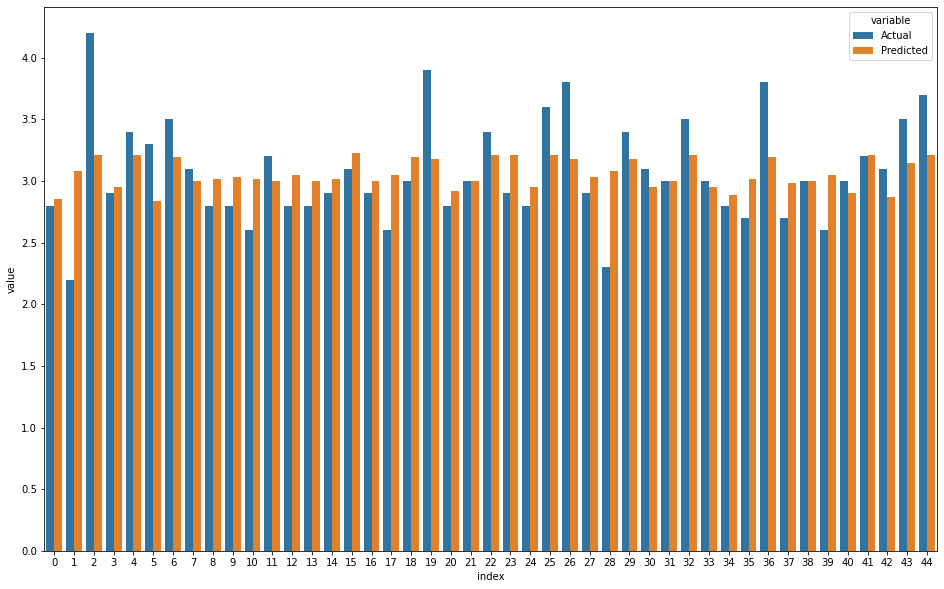

In [118]:
plt.figure(figsize=(16,10))
sns.barplot(data=df_melted, x='index', y='value', hue='variable')

In my opinion, the bargraph presented by the seaborn library is the most aesthetically pleasing. I was easier to create than using `matplotlib` but a little harder than using the `pandas.DataFrame.Plot` function, since we had to reshape our data first. I think the amount of extra work justifies the improved visuals.

Let's also plot our regression line over a scatterplot of our test data to see how we did in a different way:

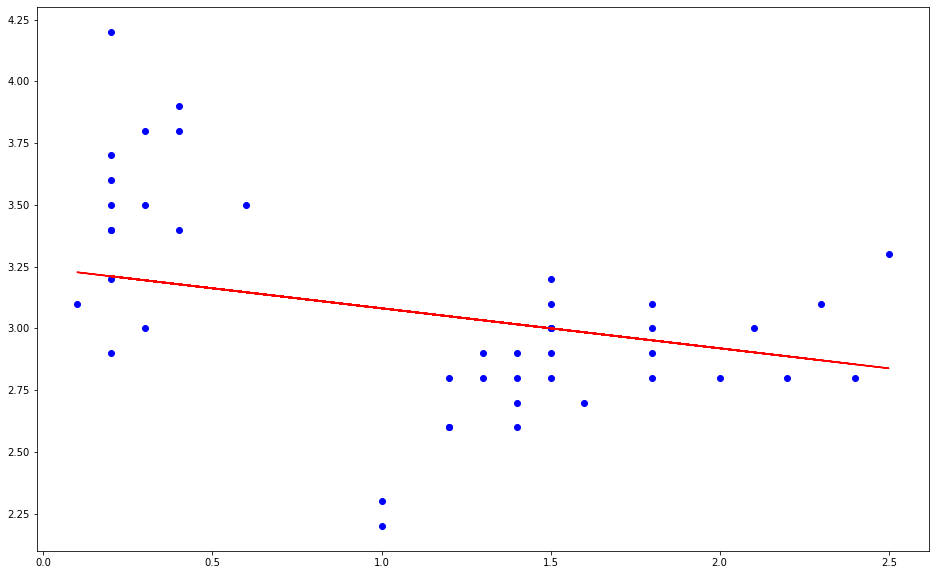

In [152]:
plt.figure(figsize=(16,10))
plt.scatter(x_test, y_test, color='b')
plt.plot(x_test, y_pred, color='r')